In [40]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# Synthetic Circle

In [ ]:
# Create dataframe from csv
df = pd.read_csv('circles.csv') 

In [ ]:
# Peek at few rows of the dataframe
df.head()

,x,y,class
0,3.15676,116.12252,6
1,16.14436,16.81660,11
2,100.31212,64.99025,53
3,-1.33773,84.81772,4
4,104.37328,62.42373,53


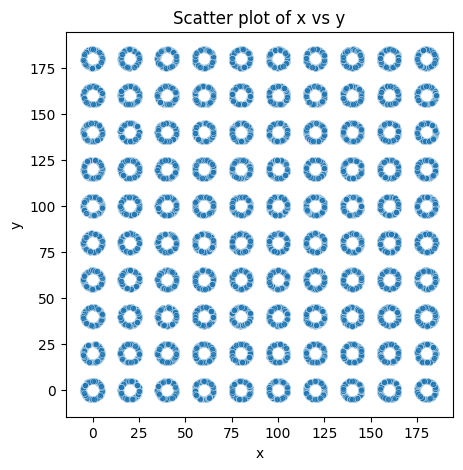

In [ ]:
# Scatter plot of the data points   
plt.figure(figsize=(5,5))
sns.scatterplot(data=df, x='x', y='y', s=20, color='tab:blue', alpha=0.7)
plt.title('Scatter plot of x vs y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Plotted graph to verify that the "dataset comprises ... points arranged into 100 circles"

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       10000 non-null  float64
 1   y       10000 non-null  float64
 2   class   10000 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 234.5 KB


$1000$ non-null data rows. $x,y \in$ float and class $\in$ int

In [46]:
df.describe()

,x,y,class
count,10000.000000,10000.000000,10000.000000
mean,89.981670,90.003827,49.500000
std,57.457467,57.559719,28.867513
min,-5.000000,-4.999860,0.000000
25%,40.237885,40.133840,24.750000
50%,89.999995,90.000080,49.500000
75%,139.898800,139.977695,74.250000
max,184.999920,185.000000,99.000000


In [51]:
print(df.isnull().sum())
df[df.duplicated(keep=False)]

x        0
y        0
class    0
dtype: int64


,x,y,class


no null entries and no duplicate rows with duplicates

In [15]:
# Data Normalization (Z-score Normalization) 
for col in ['x','y']:
    mean = df[col].mean()
    std = df[col].std()
    df[col] = (df[col] - mean) / std

Performed z-score normalization. Rationale for choosing z-score instead of min-max or other normalization techniques. Tried clustering with both and compared performance. 

In [16]:
df.head()

,x,y,class
0,-1.511116,0.453767,6
1,-1.285078,-1.271501,11
2,0.179793,-0.434567,53
3,-1.589339,-0.090100,4
4,0.250474,-0.479156,53


In [17]:
#Kmeans Clustering algorithm 
# def euclidean_distance(point, data):
#     return np.sqrt(np.sum((point - data) ** 2))

# class KMeans: 
#     #initialize k and max iterations (to prevent infinite loops)
#     def __init__(self, k, max_iterations=100):
#         self.k = k
#         self.max_iterations = max_iterations
    
#     #Main Clustering function
#     def fit(self,data):
        
#         #initalize k random centroids 
#         min_c, max_c = np.min(data, axis=0), np.max(data, axis=0)
#         self.centroids = [np.random.uniform(min_c, max_c) for _ in range(self.k)]
            
#         # Iterate to refine centroids till convergence or max iterations
#         curr_iter = 0
#         previous_centroids = None
        
#         pbar = tqdm(total=self.max_iterations, desc="Clustering Progress")
#         while previous_centroids is None or np.not_equal(previous_centroids, self.centroids).any() and curr_iter < self.max_iterations:
            
#             #sort points into clusters by computing distances to centroids and choosing smallest distance
#             sorted_pts = [[] for _ in range(self.k)]
#             for point in data:
#                 dists  = euclidean_distance(point, self.centroids)
#                 centroid_idx = np.argmin(dists)
#                 sorted_pts[centroid_idx].append(point)
            
#             #next step 
#             previous_centroids = self.centroids
#             self.centroids = [np.mean(cluster, axis=0) for cluster in sorted_pts]
#             for i, centroid in enumerate(self.centroids):
#                 if np.isnan(centroid).any():  
#                     self.centroids[i] = previous_centroids[i]
#             curr_iter += 1
#             pbar.update(1)
#         pbar.close()

#     def silhouette_score(self, data):
#         # Assign points to clusters
#         labels = []
#         for point in data:
#             dists = euclidean_distance(point, self.centroids)
#             centroid_idx = np.argmin(dists)
#             labels.append(centroid_idx)
        
#         labels = np.array(labels)
#         silhouette_scores = []
        
#         for i, point in tqdm(enumerate(data), total=len(data), desc="Silhouette Score Progress"):
#             # Points in same cluster
#             same_cluster_mask = labels == labels[i]
#             same_cluster_points = data[same_cluster_mask]
            
#             # Calculate a: mean distance to points in same cluster
#             if len(same_cluster_points) > 1:
#                 a = np.mean([euclidean_distance(point, p) for p in same_cluster_points if not np.array_equal(p, point)])
#             else:
#                 a = 0
            
#             # Calculate b: minimum mean distance to points in other clusters
#             b = np.inf
#             for cluster_idx in range(self.k):
#                 if cluster_idx != labels[i]:
#                     other_cluster_mask = labels == cluster_idx
#                     other_cluster_points = data[other_cluster_mask]
#                     if len(other_cluster_points) > 0:
#                         mean_dist = np.mean([euclidean_distance(point, p) for p in other_cluster_points])
#                         b = min(b, mean_dist)
            
#             # Calculate silhouette score for this point
#             if max(a, b) > 0:
#                 silhouette_scores.append((b - a) / max(a, b))
#             else:
#                 silhouette_scores.append(0)
        
#         return np.mean(silhouette_scores)

In [18]:
# X = df[['x','y']].values 
# kmeans = KMeans(k=100, max_iterations=100)
# kmeans.fit(X)
# score = kmeans.silhouette_score(df[['x','y']].values)
# print(f'Silhouette Score: {score}')

In [19]:
# from sklearn.cluster import KMeans as SKKMeans
# from sklearn.metrics import silhouette_score
# # X = your feature array, shape (n_points, 2)
# k = 100  # same as your custom KMeans

# sk_kmeans = SKKMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=0)
# sk_kmeans.fit(X)

# # Get cluster labels
# labels_sk = sk_kmeans.labels_
# S_sk = silhouette_score(X, labels_sk)
# print(f"Sklearn KMeans Silhouette Score: {S_sk:.4f}")
